In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier detection
from scipy.stats import zscore

%matplotlib inline
sns.set(style='white', context='notebook')

In [2]:
data = pd.read_csv(r"C:\Users\BAPS\Downloads\regression\Life Expectancy Data (1).csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.shape

(2938, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:

data = data.dropna(subset=["Life expectancy "], axis=0)


In [8]:
data.shape

(2928, 22)

In [9]:
data["Adult Mortality"].isnull().sum()

np.int64(0)

In [10]:
data.shape

(2928, 22)

In [11]:
data['Alcohol'].isnull().sum()

np.int64(193)

In [12]:
# Fill missing values with mean alcohol consumption per country
data['Alcohol'] = data.groupby('Country')['Alcohol'].transform(lambda x: x.fillna(x.mean()))



In [13]:
# Check for non-numeric entries
print(data['Alcohol'].unique())



[0.01  0.03  0.02  ... 4.482 3.56  4.57 ]


In [14]:
data['Alcohol']= data['Alcohol'].fillna(data['Alcohol'].median())


In [15]:

# Impute using country-wise mean
data['Hepatitis B'] = data.groupby('Country')['Hepatitis B'].transform(lambda x: x.fillna(x.mean()))



In [16]:
data['Hepatitis B']=data['Hepatitis B'].fillna(data['Hepatitis B'].median())

In [17]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [18]:
data['Total expenditure']=data['Total expenditure'].fillna(data['Total expenditure'].median())

In [19]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                    0
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [20]:
data.drop("Schooling",axis=1,inplace = True)

In [21]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                    0
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
dtype: int64

In [22]:
data[' BMI ']=data[' BMI '].fillna(data[' BMI '].median())
data['Polio']=data['Polio'].fillna(data['Polio'].median())
data['Diphtheria ']=data['Diphtheria '].fillna(data['Diphtheria '].median())
data[' thinness  1-19 years']=data[' thinness  1-19 years'].fillna(data[' thinness  1-19 years'].median())
data[' thinness 5-9 years']=data[' thinness 5-9 years'].fillna(data[' thinness 5-9 years'].median())

In [23]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources'],
      dtype='object')

In [24]:

# Impute using country-wise mean
data['GDP'] = data.groupby('Country')['GDP'].transform(lambda x: x.fillna(x.mean()))



In [25]:
global_gdp_mean = data['GDP'].mean()
data['GDP'] = data.groupby('Country')['GDP'].transform(lambda x: x.fillna(x.mean())).fillna(global_gdp_mean)


In [26]:
global_gdp_population = data["Population"].mean()
data['Population'] = data.groupby(['Country', 'Year'])['Population'].transform(lambda x: x.fillna(x.mean())).fillna(global_gdp_population)


In [27]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources'],
      dtype='object')

In [28]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    160
dtype: int64

In [29]:
data['Income composition of resources']=data['Income composition of resources'].fillna(data['Income composition of resources'].median())

In [30]:
data.drop("Measles ",axis=1,inplace=True)

In [31]:
# Encoding 'Status' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])


In [32]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454


In [33]:
num = data.select_dtypes(include=np.number)
skeww = num.skew()
print(skeww)

Year                                0.000000
Status                             -1.712798
Life expectancy                    -0.638605
Adult Mortality                     1.174369
infant deaths                       9.771044
Alcohol                             0.592797
percentage expenditure              4.643790
Hepatitis B                        -1.725794
 BMI                               -0.239842
under-five deaths                   9.479623
Polio                              -2.108851
Total expenditure                   0.617961
Diphtheria                         -2.083450
 HIV/AIDS                           5.386623
GDP                                 3.481077
Population                         18.010899
 thinness  1-19 years               1.727662
 thinness 5-9 years                 1.793650
Income composition of resources    -1.208178
dtype: float64


In [34]:
import numpy as np

# Apply log1p (log(1 + x)) to avoid issues with zero values
log_transform_features = ['infant deaths', 'percentage expenditure',  
                          'under-five deaths ', ' HIV/AIDS', 'GDP', 'Population']

for feature in log_transform_features:
    data[feature] = np.log1p(data[feature])


In [35]:
num = data.select_dtypes(include=np.number)
skeww = num.skew()
print(skeww)

Year                               0.000000
Status                            -1.712798
Life expectancy                   -0.638605
Adult Mortality                    1.174369
infant deaths                      0.697864
Alcohol                            0.592797
percentage expenditure            -0.080296
Hepatitis B                       -1.725794
 BMI                              -0.239842
under-five deaths                  0.643248
Polio                             -2.108851
Total expenditure                  0.617961
Diphtheria                        -2.083450
 HIV/AIDS                          2.121858
GDP                               -0.380104
Population                        -0.929822
 thinness  1-19 years              1.727662
 thinness 5-9 years                1.793650
Income composition of resources   -1.208178
dtype: float64


In [36]:
num = data.select_dtypes(include=np.number)
kurtt = num.kurt()
print(kurtt)

Year                              -1.209428
Status                             0.934314
Life expectancy                   -0.234477
Adult Mortality                    1.748860
infant deaths                     -0.331510
Alcohol                           -0.791435
percentage expenditure            -1.018621
Hepatitis B                        2.133622
 BMI                              -1.294107
under-five deaths                 -0.510103
Polio                              3.829795
Total expenditure                  1.338509
Diphtheria                         3.609373
 HIV/AIDS                          4.053498
GDP                               -0.227668
Population                         0.756694
 thinness  1-19 years              4.050771
 thinness 5-9 years                4.443803
Income composition of resources    1.676962
dtype: float64


In [37]:
data.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources
0,Afghanistan,2015,1,65.0,263.0,4.143135,0.01,4.280542,65.0,19.1,4.430817,6.0,8.16,65.0,0.09531,6.372055,17.334091,17.2,17.3,0.479
1,Afghanistan,2014,1,59.9,271.0,4.174387,0.01,4.311116,62.0,18.6,4.465908,58.0,8.18,62.0,0.09531,6.419501,12.699497,17.5,17.5,0.476
2,Afghanistan,2013,1,59.9,268.0,4.204693,0.01,4.307023,64.0,18.1,4.499810,62.0,8.13,64.0,0.09531,6.450067,17.272826,17.7,17.7,0.470
3,Afghanistan,2012,1,59.5,272.0,4.248495,0.01,4.371777,67.0,17.6,4.543295,67.0,8.52,67.0,0.09531,6.508708,15.123021,17.9,18.0,0.463
4,Afghanistan,2011,1,59.2,275.0,4.276666,0.01,2.091507,68.0,17.2,4.584967,68.0,7.87,68.0,0.09531,4.167242,14.906964,18.2,18.2,0.454
5,Afghanistan,2010,1,58.8,279.0,4.317488,0.01,4.390483,66.0,16.7,4.634729,66.0,9.20,66.0,0.09531,6.317758,14.874400,18.4,18.4,0.448
6,Afghanistan,2009,1,58.6,281.0,4.356709,0.01,4.056335,63.0,16.2,4.672829,63.0,9.42,63.0,0.09531,6.102320,12.557898,18.6,18.7,0.434
7,Afghanistan,2008,1,58.1,287.0,4.394449,0.03,3.291156,64.0,15.7,4.709530,64.0,8.33,64.0,0.09531,5.925221,14.819604,18.8,18.9,0.433
8,Afghanistan,2007,1,57.5,295.0,4.418841,0.02,2.477391,63.0,15.2,4.736198,63.0,6.73,63.0,0.09531,5.915759,17.097053,19.0,19.1,0.415
9,Afghanistan,2006,1,57.3,295.0,4.442651,0.03,2.899855,64.0,14.7,4.762174,58.0,7.43,58.0,0.09531,5.611535,14.766916,19.2,19.3,0.405


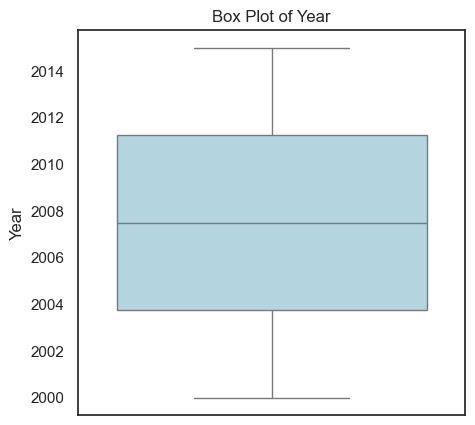

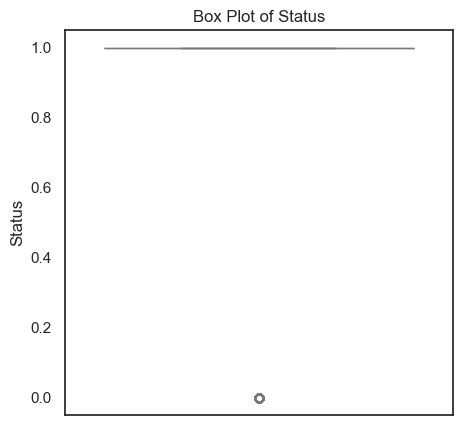

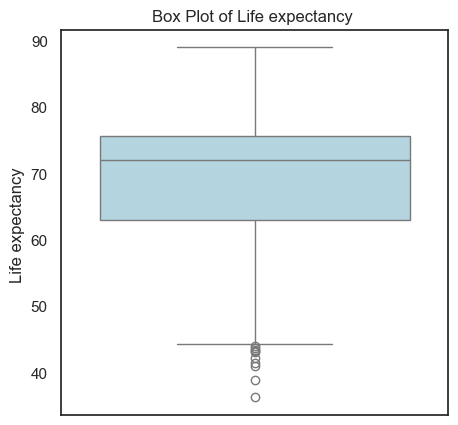

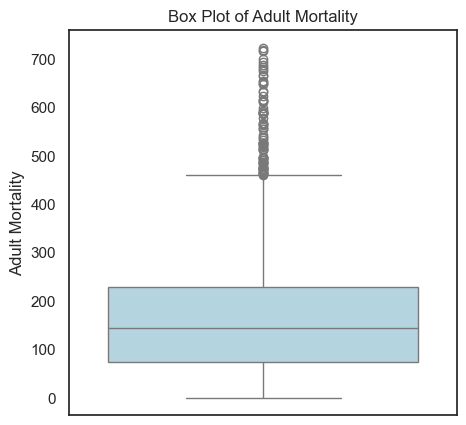

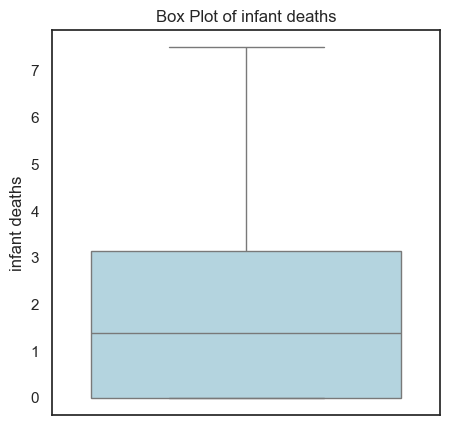

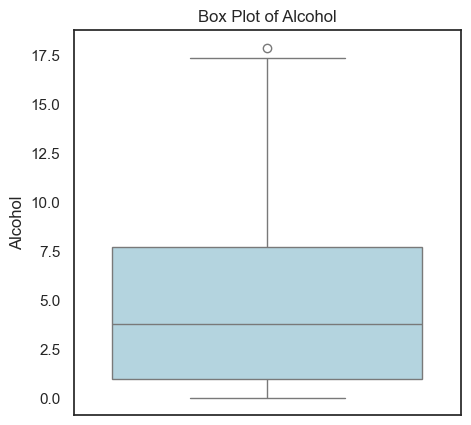

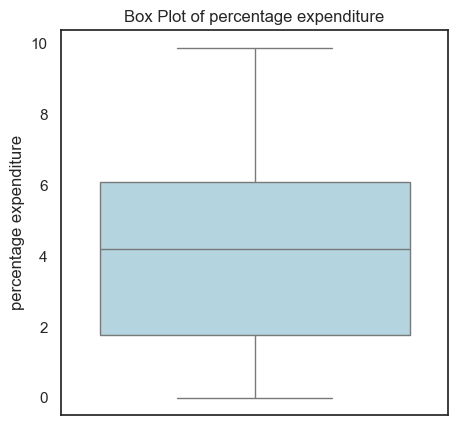

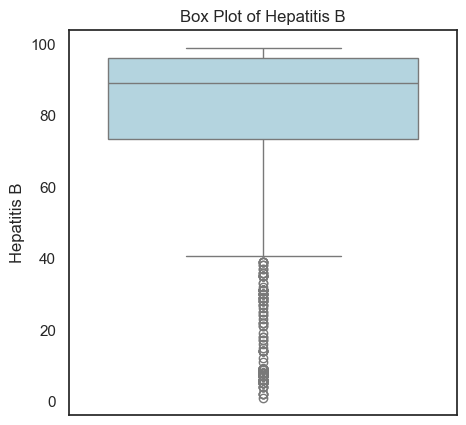

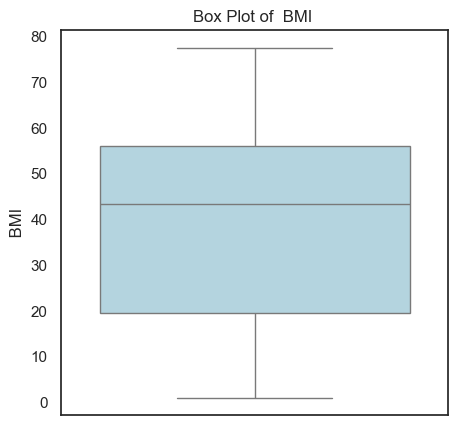

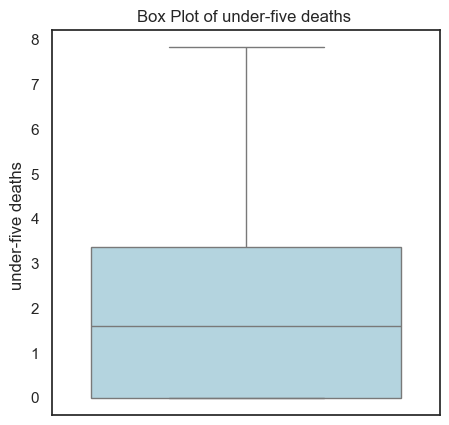

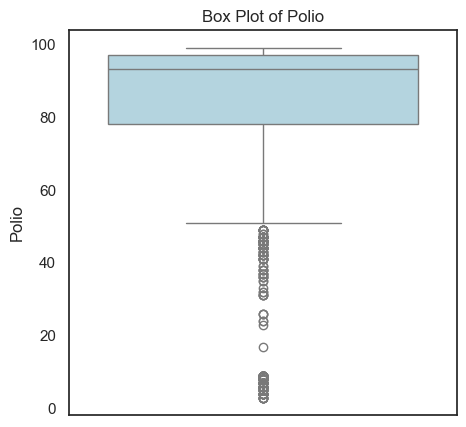

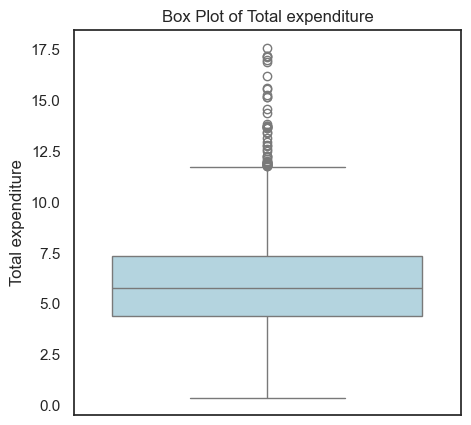

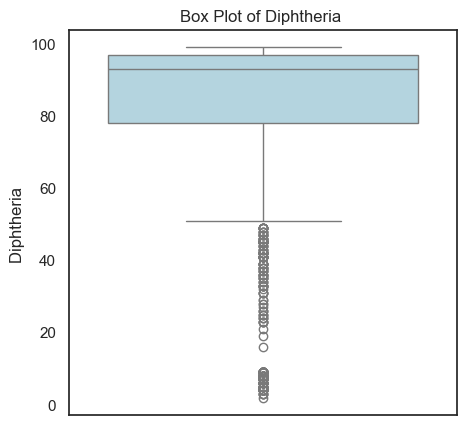

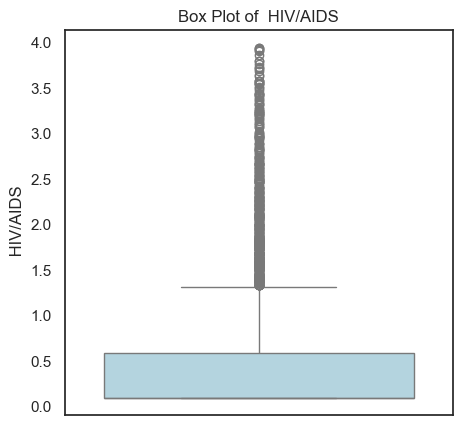

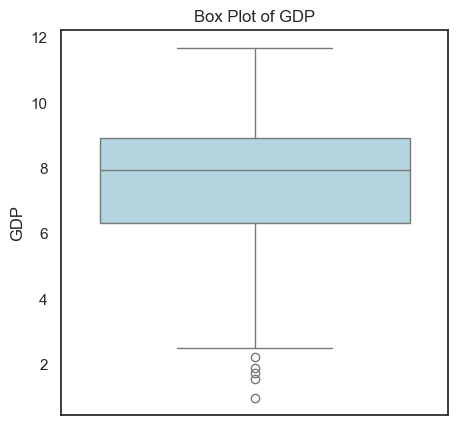

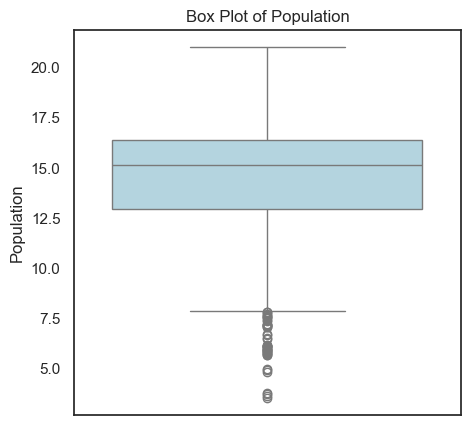

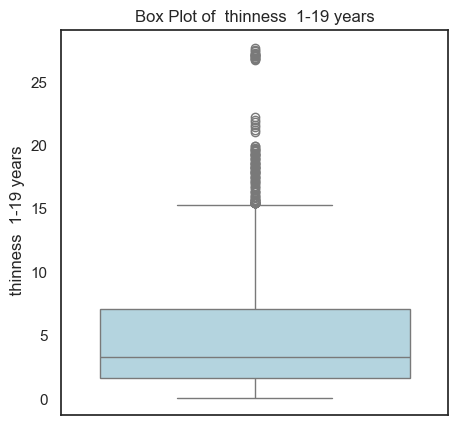

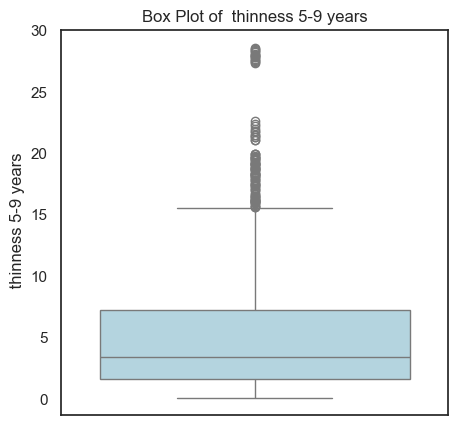

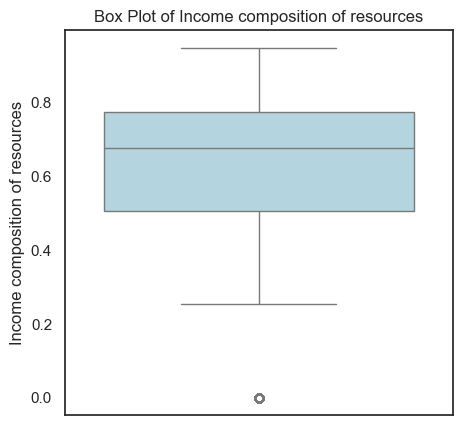

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through only numeric columns
for col in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(5, 5))  # Optional: controls plot size
    sns.boxplot(y=col, data=data, color='lightblue')
    plt.title(f'Box Plot of {col}')

    plt.show()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_16492\1050042917.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

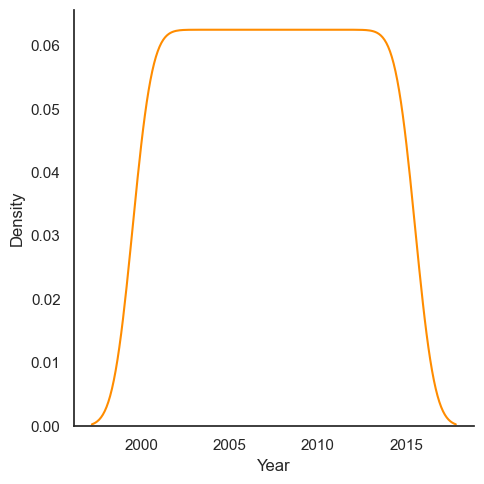

<Figure size 1000x500 with 0 Axes>

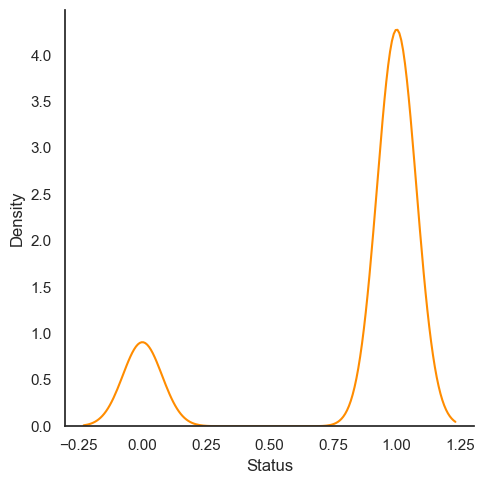

<Figure size 1000x500 with 0 Axes>

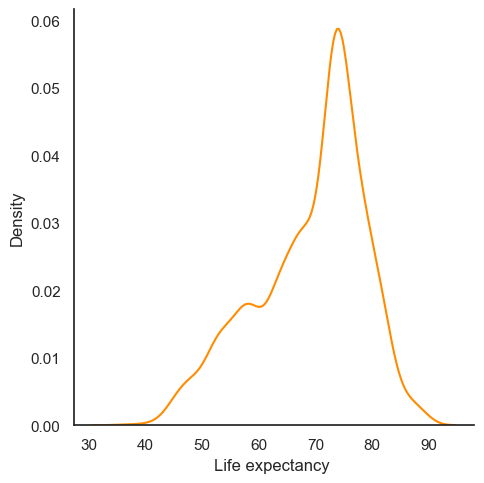

<Figure size 1000x500 with 0 Axes>

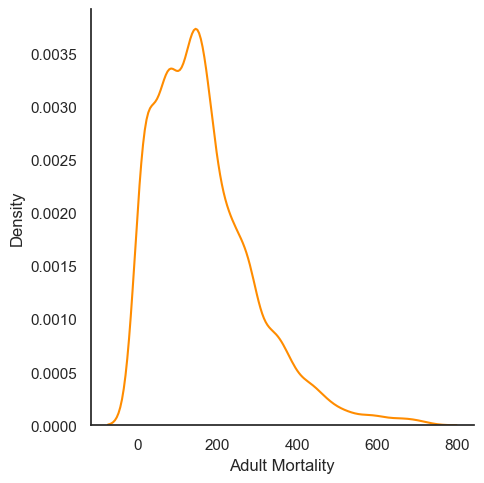

<Figure size 1000x500 with 0 Axes>

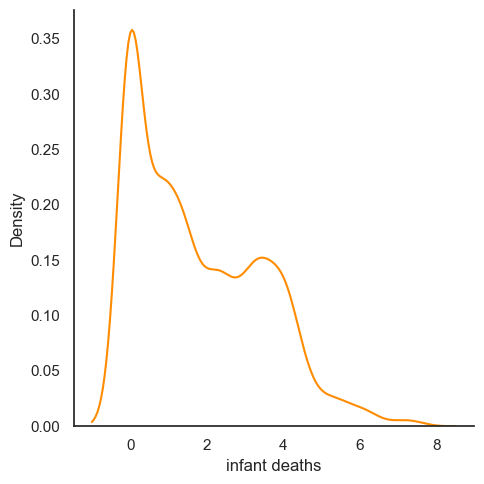

<Figure size 1000x500 with 0 Axes>

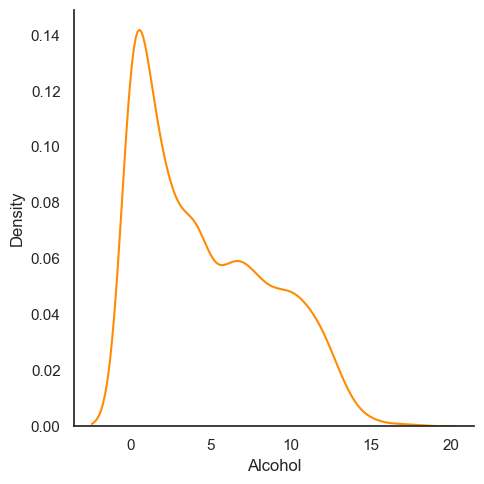

<Figure size 1000x500 with 0 Axes>

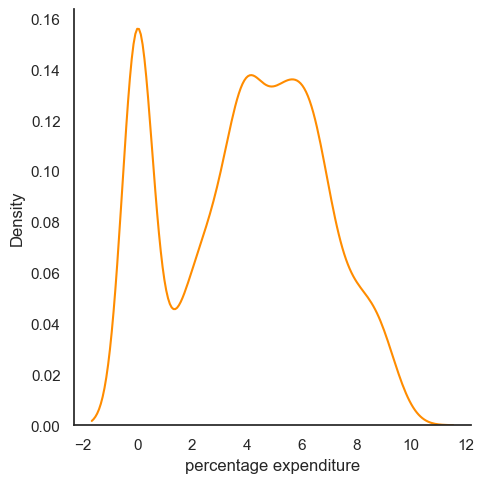

<Figure size 1000x500 with 0 Axes>

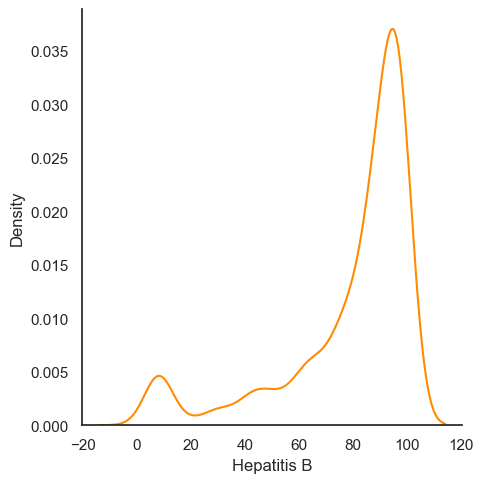

<Figure size 1000x500 with 0 Axes>

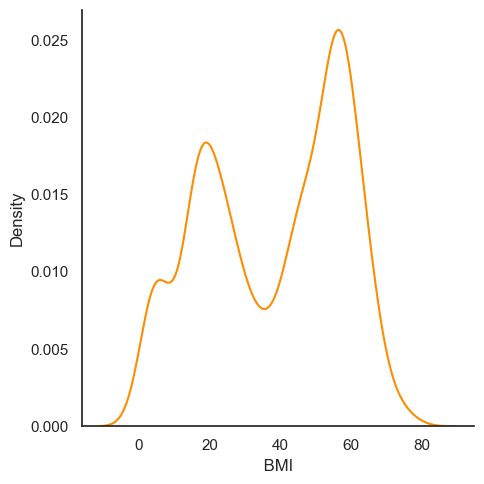

<Figure size 1000x500 with 0 Axes>

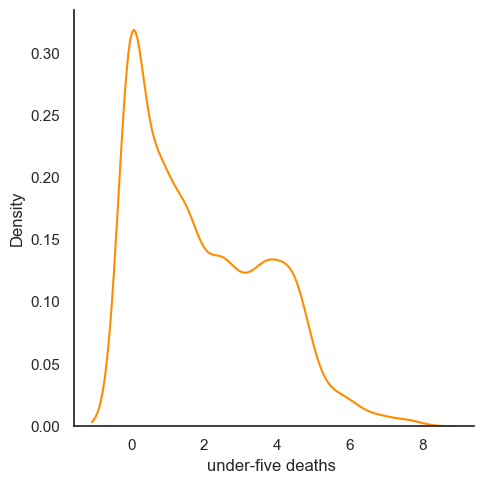

<Figure size 1000x500 with 0 Axes>

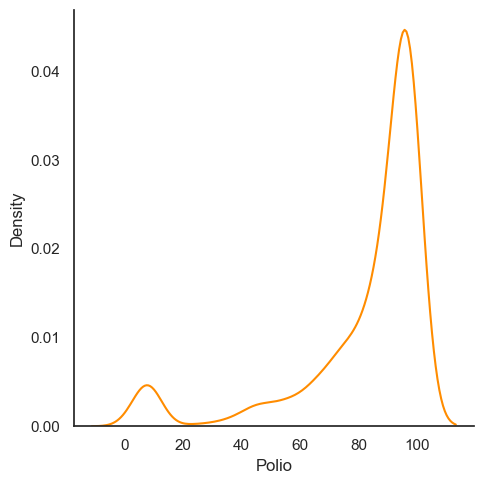

<Figure size 1000x500 with 0 Axes>

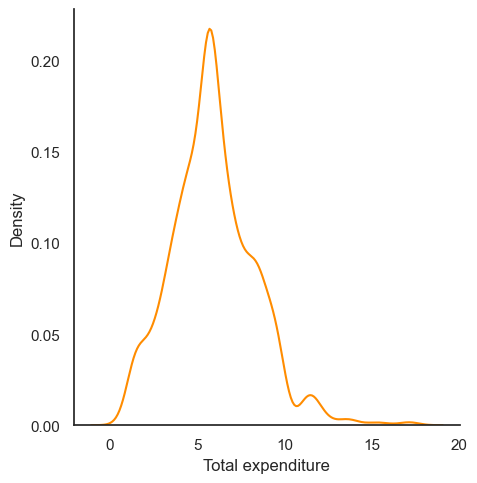

<Figure size 1000x500 with 0 Axes>

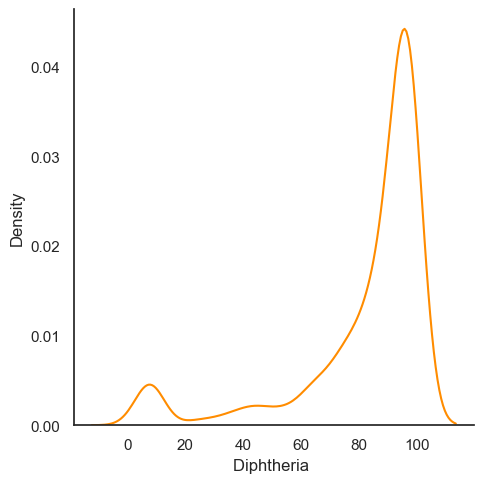

<Figure size 1000x500 with 0 Axes>

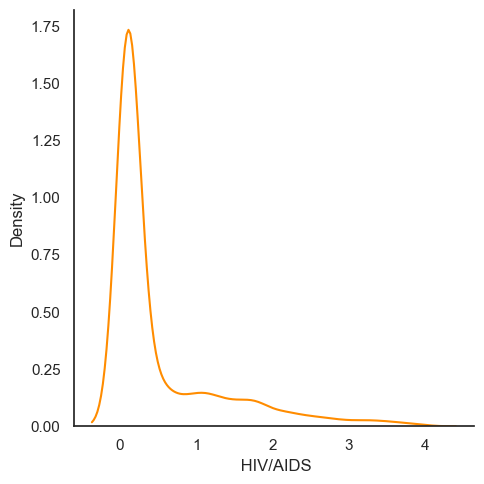

<Figure size 1000x500 with 0 Axes>

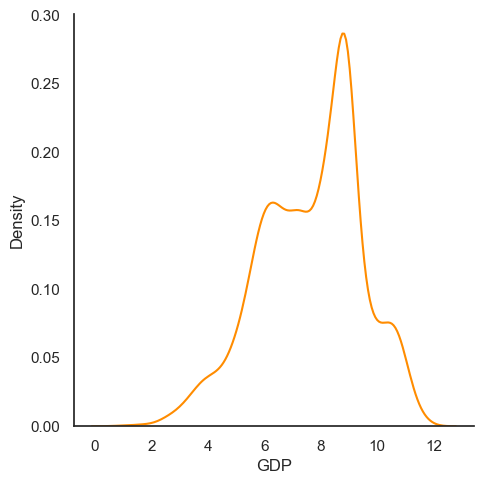

<Figure size 1000x500 with 0 Axes>

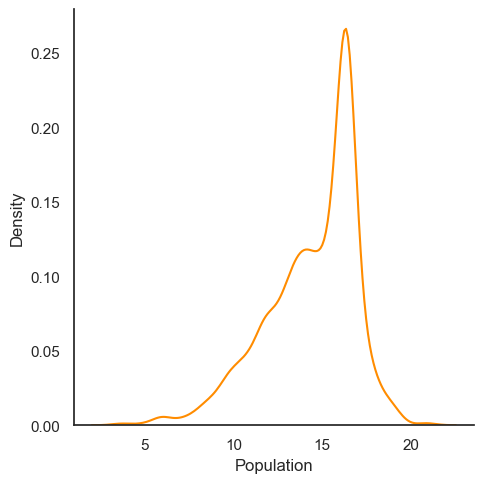

<Figure size 1000x500 with 0 Axes>

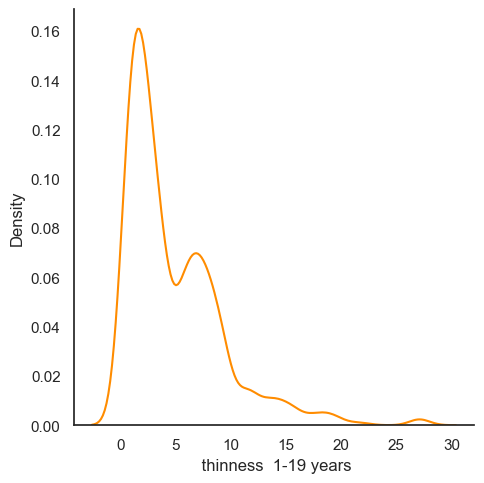

<Figure size 1000x500 with 0 Axes>

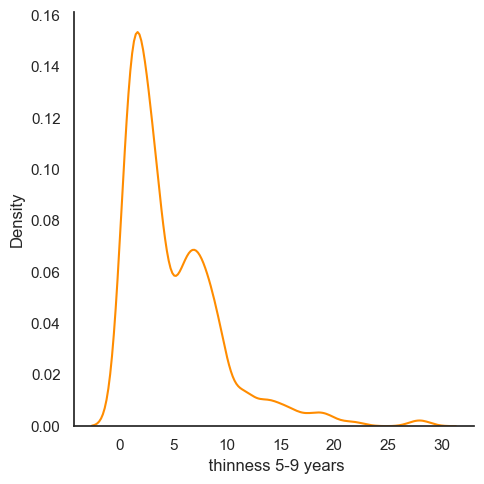

<Figure size 1000x500 with 0 Axes>

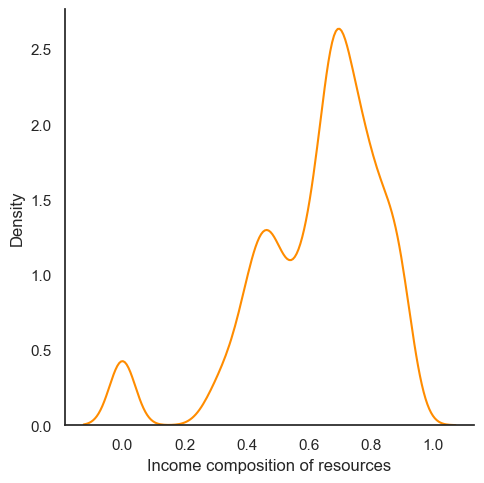

In [39]:
res = data.select_dtypes(include=np.number).columns
for column in res :
    plt.figure(figsize=(10,5))
    sns.displot(data[column],color='darkorange',kind='kde')

In [40]:
num = data.select_dtypes(include=np.number)
skeww = num.skew()
print(skeww)

Year                               0.000000
Status                            -1.712798
Life expectancy                   -0.638605
Adult Mortality                    1.174369
infant deaths                      0.697864
Alcohol                            0.592797
percentage expenditure            -0.080296
Hepatitis B                       -1.725794
 BMI                              -0.239842
under-five deaths                  0.643248
Polio                             -2.108851
Total expenditure                  0.617961
Diphtheria                        -2.083450
 HIV/AIDS                          2.121858
GDP                               -0.380104
Population                        -0.929822
 thinness  1-19 years              1.727662
 thinness 5-9 years                1.793650
Income composition of resources   -1.208178
dtype: float64


In [41]:
# # List of numerical features to scale
# numerical_features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B'
#                       , ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', 
#                       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 
#                       'Income composition of resources']

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the numerical features
# data[numerical_features] = scaler.fit_transform(data[numerical_features])

# # Display the first few rows of the preprocessed data
# print("\nPreprocessed Data Head:")
# print(data.head())

# # Save the preprocessed data to a new CSV file (optional)
# data.to_csv('Preprocessed_Life_Expectancy_Data.csv', index=False)

In [42]:
data = pd.read_csv('Preprocessed_Life_Expectancy_Data.csv')


In [43]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources
0,Afghanistan,2015,1,65.0,0.790238,0.267520,-1.141902,-0.336102,-0.575547,-0.966625,0.254061,-3.280973,0.940554,-0.735614,-0.324055,-0.516419,0.389111,2.811294,2.771431,-0.735757
1,Afghanistan,2014,1,59.9,0.854614,0.284455,-1.141902,-0.334975,-0.697434,-0.991809,0.272732,-1.054149,0.948938,-0.862511,-0.324055,-0.514261,-0.230754,2.879495,2.816006,-0.750362
2,Afghanistan,2013,1,59.9,0.830473,0.301391,-1.141902,-0.335128,-0.616176,-1.016993,0.291403,-0.882855,0.927978,-0.777913,-0.324055,-0.512815,0.351914,2.924962,2.860582,-0.779573
3,Afghanistan,2012,1,59.5,0.862660,0.326794,-1.141902,-0.332633,-0.494289,-1.042177,0.316299,-0.668737,1.091462,-0.651015,-0.324055,-0.509915,-0.168239,2.970429,2.927445,-0.813652
4,Afghanistan,2011,1,59.2,0.886801,0.343730,-1.141902,-0.368345,-0.453660,-1.062324,0.341194,-0.625914,0.818989,-0.608716,-0.324055,-0.555937,-0.181567,3.038629,2.972020,-0.857467


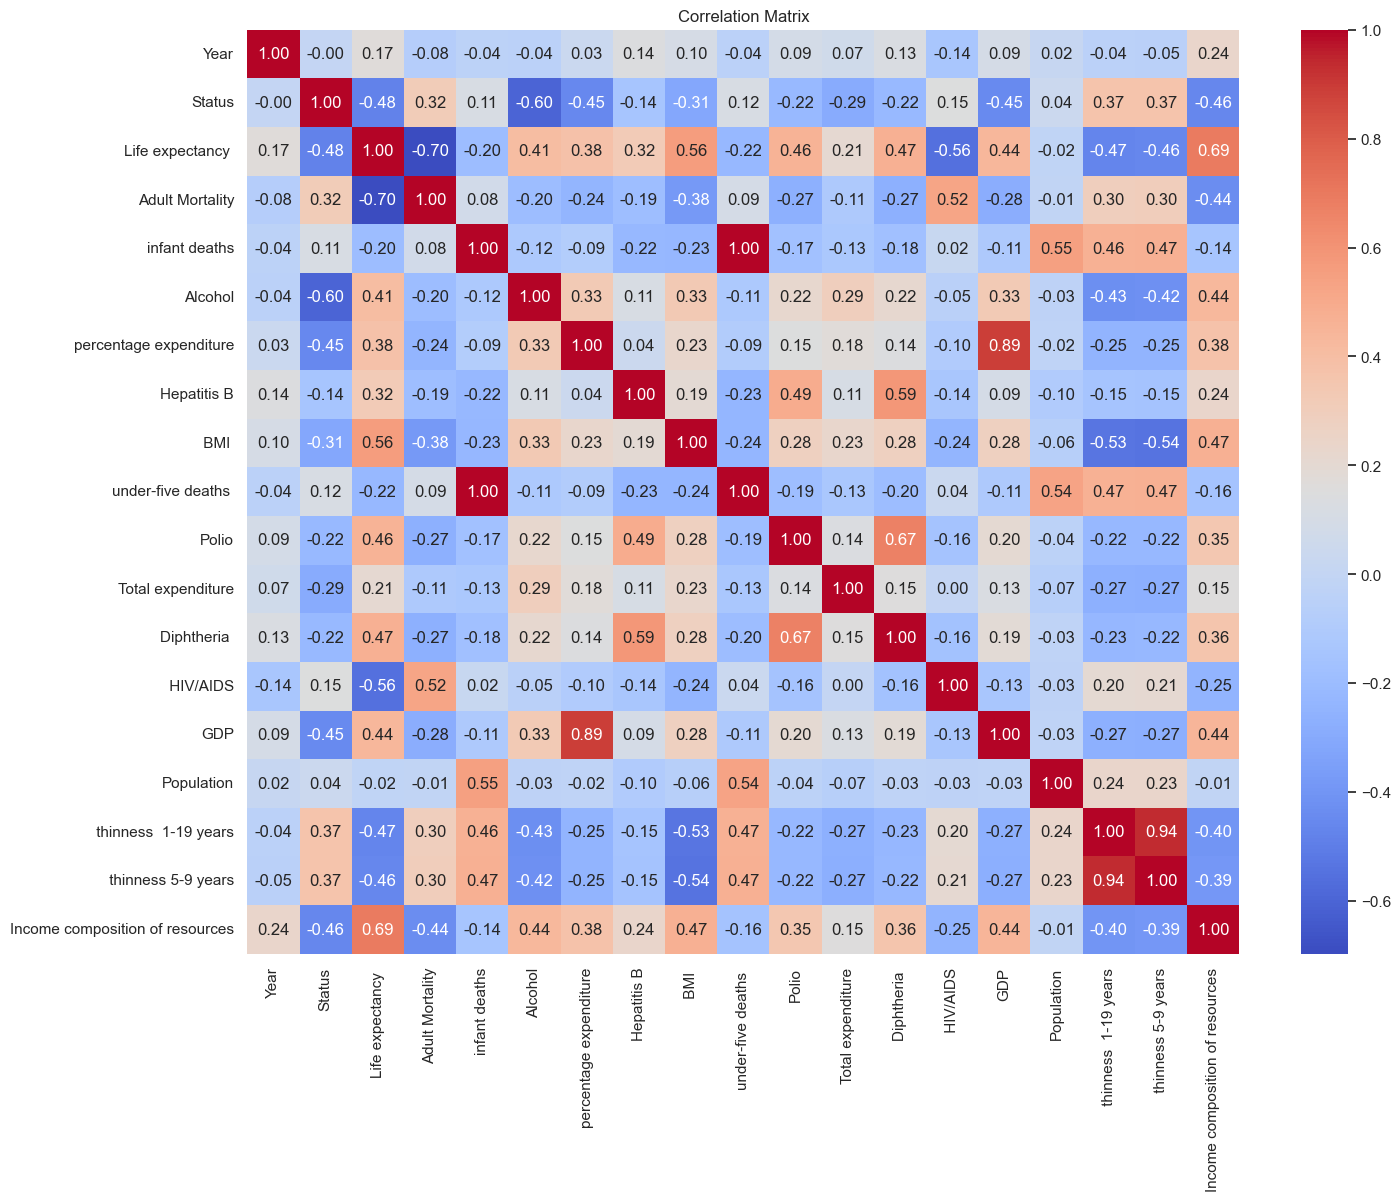

In [44]:
plt.figure(figsize=(16, 12))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [45]:
print(correlation_matrix)

                                         Year        Status  Life expectancy   \
Year                             1.000000e+00 -5.534143e-15          0.170033   
Status                          -5.534143e-15  1.000000e+00         -0.482136   
Life expectancy                  1.700330e-01 -4.821361e-01          1.000000   
Adult Mortality                 -7.905159e-02  3.152844e-01         -0.696359   
infant deaths                   -3.646405e-02  1.127082e-01         -0.196557   
Alcohol                         -4.415812e-02 -5.993961e-01          0.406730   
percentage expenditure           3.272257e-02 -4.540322e-01          0.381864   
Hepatitis B                      1.393707e-01 -1.445840e-01          0.324002   
 BMI                             1.040567e-01 -3.133139e-01          0.558888   
under-five deaths               -4.197985e-02  1.156615e-01         -0.222529   
Polio                            9.172655e-02 -2.192209e-01          0.459458   
Total expenditure           

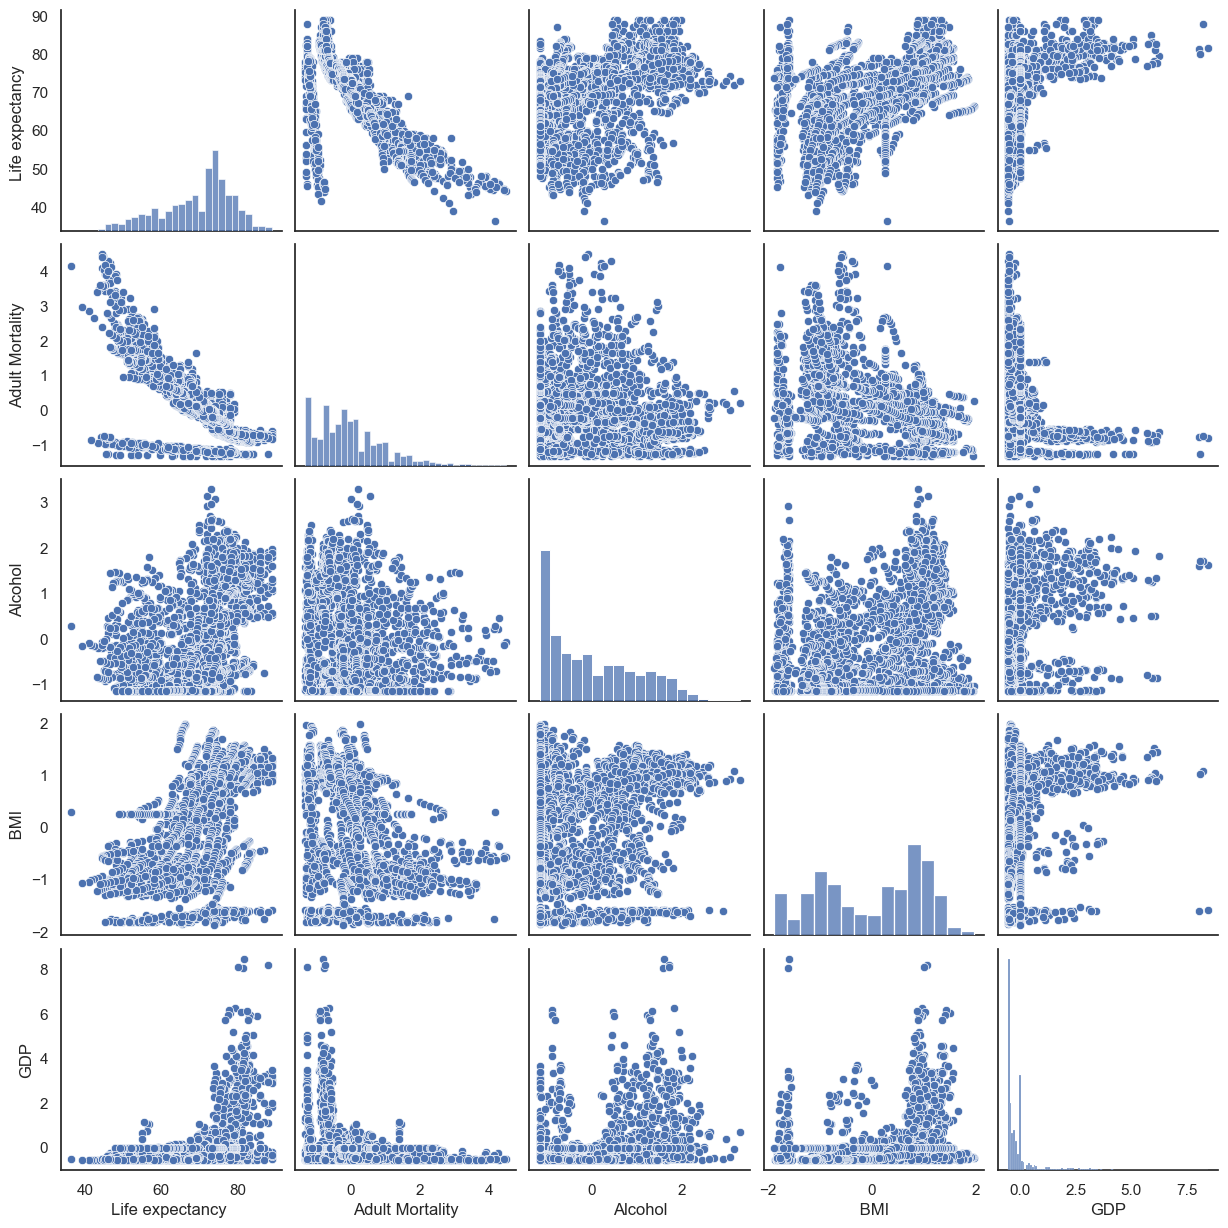

In [46]:
selected_features = ['Life expectancy ', 'Adult Mortality', 'Alcohol', ' BMI ', 'GDP']
sns.pairplot(data[selected_features])
plt.show()

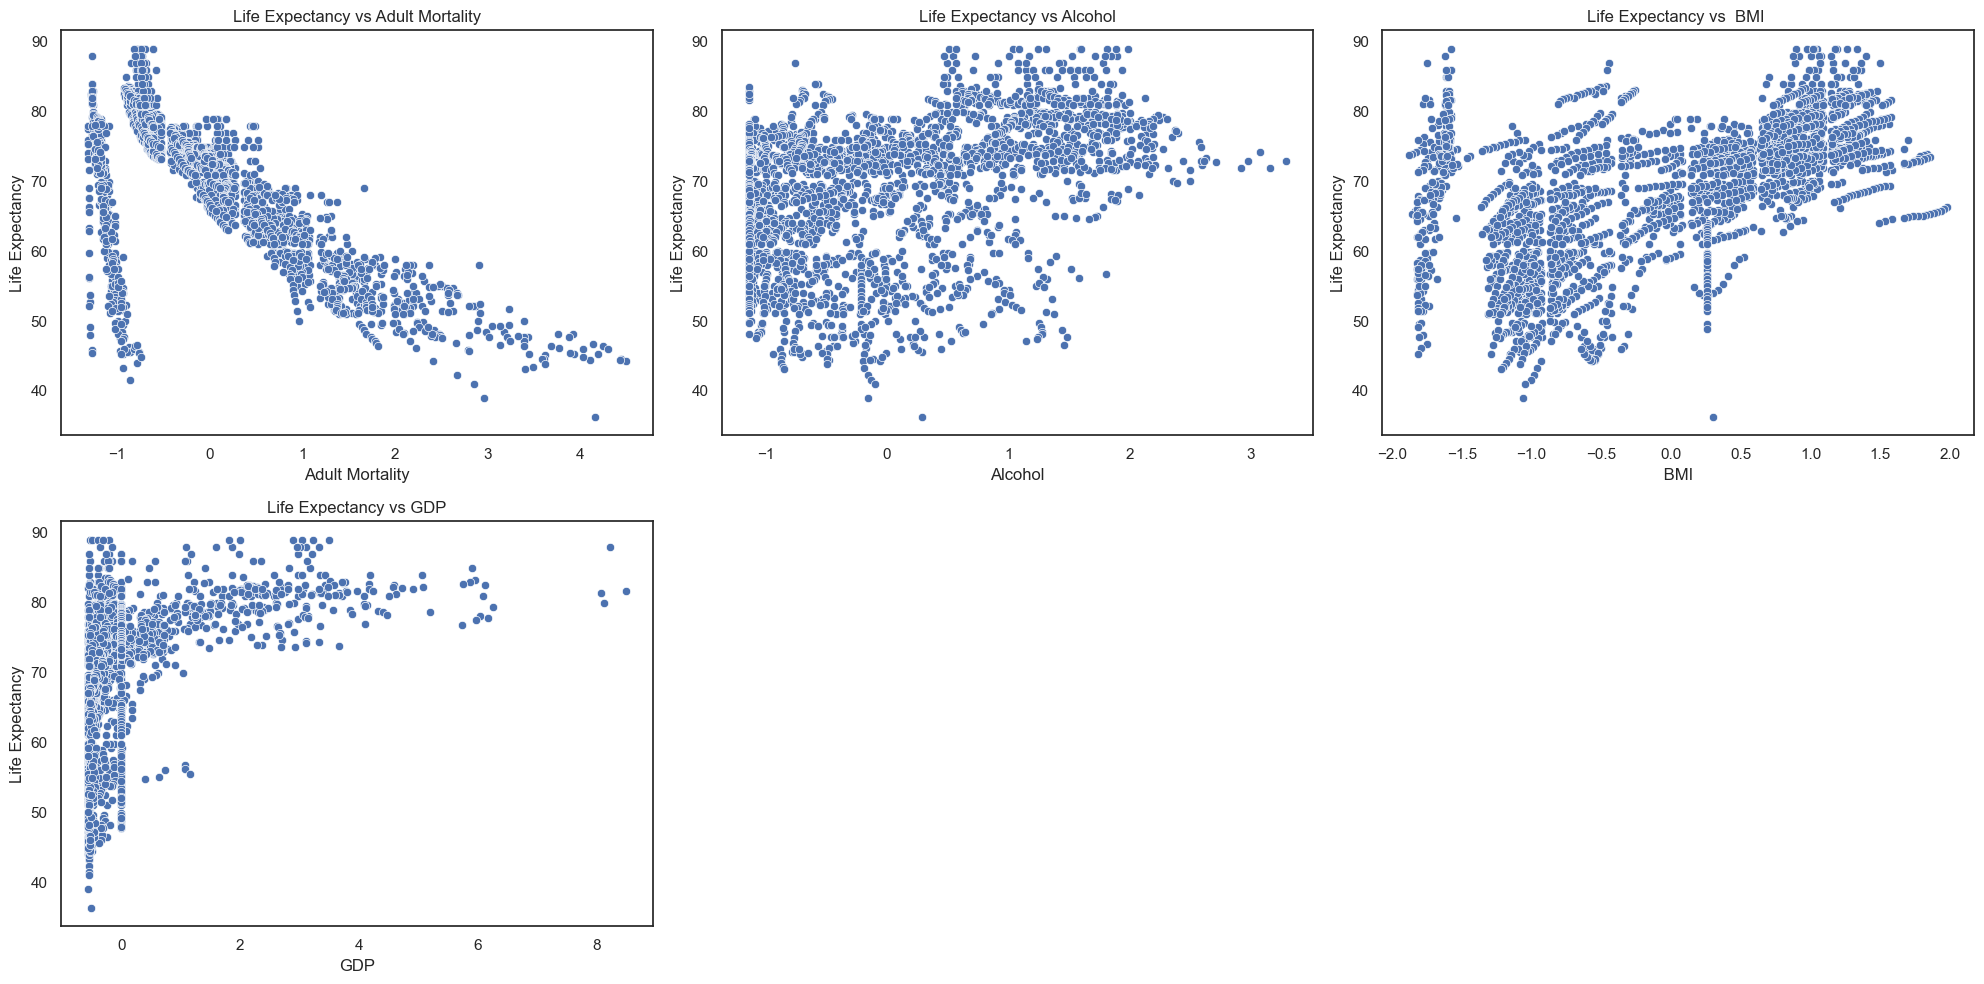

In [47]:
numerical_features = ['Adult Mortality', 'Alcohol', ' BMI ', 'GDP']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=feature, y='Life expectancy ', data=data)
    plt.title(f'Life Expectancy vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

In [48]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources
0,Afghanistan,2015,1,65.0,0.790238,0.267520,-1.141902,-0.336102,-0.575547,-0.966625,0.254061,-3.280973,0.940554,-0.735614,-0.324055,-0.516419,0.389111,2.811294,2.771431,-0.735757
1,Afghanistan,2014,1,59.9,0.854614,0.284455,-1.141902,-0.334975,-0.697434,-0.991809,0.272732,-1.054149,0.948938,-0.862511,-0.324055,-0.514261,-0.230754,2.879495,2.816006,-0.750362
2,Afghanistan,2013,1,59.9,0.830473,0.301391,-1.141902,-0.335128,-0.616176,-1.016993,0.291403,-0.882855,0.927978,-0.777913,-0.324055,-0.512815,0.351914,2.924962,2.860582,-0.779573
3,Afghanistan,2012,1,59.5,0.862660,0.326794,-1.141902,-0.332633,-0.494289,-1.042177,0.316299,-0.668737,1.091462,-0.651015,-0.324055,-0.509915,-0.168239,2.970429,2.927445,-0.813652
4,Afghanistan,2011,1,59.2,0.886801,0.343730,-1.141902,-0.368345,-0.453660,-1.062324,0.341194,-0.625914,0.818989,-0.608716,-0.324055,-0.555937,-0.181567,3.038629,2.972020,-0.857467


In [49]:
# Regression
x = data.drop(["Life expectancy ","Country"],axis=1)


In [50]:
y = data["Life expectancy "]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2342, 18)
(586, 18)
(2342,)
(586,)


In [53]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
y_predict_lr_train = lr_model.predict(X_train)
y_predict_lr_test = lr_model.predict(X_test)

In [55]:
from sklearn.metrics import r2_score 
print(r2_score(y_train, y_predict_lr_train))
print("\n")
print(r2_score(y_test, y_predict_lr_test))

0.8036659881856492


0.8000688402387979


In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Create Ridge model with a fixed alpha
ridge_model = Ridge(alpha=1.0)

# Fit the model
ridge_model.fit(X_train, y_train)

# Predict
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

# Evaluate
print("Train R² score:", r2_score(y_train, y_pred_train))
print("Test R² score:", r2_score(y_test, y_pred_test))


Train R² score: 0.8034849736832794
Test R² score: 0.8000036868947646


In [57]:
# Polynomial Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)
 
model = LinearRegression()
model.fit(x_train_poly, y_train)
 
y_pred_train = model.predict(x_train_poly)
y_pred_test = model.predict(x_test_poly)
 
r2_test = r2_score(y_test,y_pred_test)
r2_train = r2_score(y_train,y_pred_train)
print("R2 score of Training : ",r2_train)
print("R2 score of Testing : ",r2_test)

R2 score of Training :  0.9300441173516527
R2 score of Testing :  0.9000448735654215


In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Create the model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt_train = dt_model.predict(X_train)
y_pred_dt_test = dt_model.predict(X_test)

# Evaluate
print("Train R² score:", r2_score(y_train, y_pred_train))
print("Test R² score:", r2_score(y_test, y_pred_test))


Train R² score: 0.9300441173516527
Test R² score: 0.9000448735654215


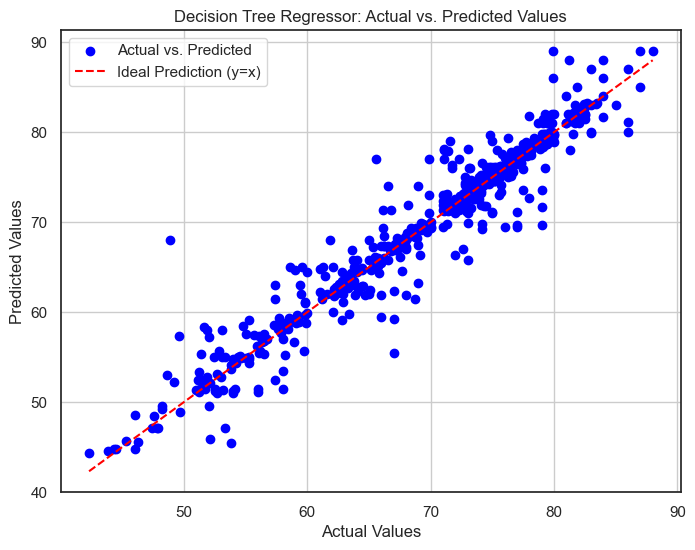

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt_test, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction (y=x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor: Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
 
# Define model
dt = DecisionTreeRegressor(random_state=42)
 
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 5)),
    # 'min_samples_split': [np.random.randint(1, 50)],
    # 'min_samples_leaf': [np.random.randint(1, 20)],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}
 
# GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)
 
# Fit model
grid_search.fit(X_train, y_train)
 
# Best model
best_dt = grid_search.best_estimator_
 
# Predict
y_predict_train = best_dt.predict(X_train)
y_predict_test = best_dt.predict(X_test)
 
# Scores
from sklearn.metrics import r2_score
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))
print("Best Parameters:", grid_search.best_params_)
 

 

Train R2: 0.981236730289619
Test R2 : 0.9313553439708702
Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 8}


In [61]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np
 
# Define model
dt = DecisionTreeRegressor(random_state=42)
 
# Define hyperparameter distributions
param_dist = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 5)),
    # 'min_samples_split': [np.random.randint(1, 50)],
    # 'min_samples_leaf': [np.random.randint(1, 20)],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}
 
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions = param_dist,
    n_iter=20,           # Try 30 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
 
# Fit model
random_search.fit(X_train, y_train)
 
# Best model
best_dt_random = random_search.best_estimator_
 
# Predict
y_predict_train = best_dt_random.predict(X_train)
y_predict_test = best_dt_random.predict(X_test)
 
# Scores
print("Train R2:", r2_score(y_train, y_predict_train))
print("Test R2 :", r2_score(y_test, y_predict_test))
print("Best Parameters:", random_search.best_params_)
 

Train R2: 0.9842012139495936
Test R2 : 0.932273014732309
Best Parameters: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'criterion': 'squared_error'}


In [62]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_predict_rf_train = rf_model.predict(X_train)
y_predict_rf_test = rf_model.predict(X_test)
print(r2_score(y_train, y_predict_rf_train))
print("\n")
print(r2_score(y_test, y_predict_rf_test))

0.9945154978515317


0.9658855012088462


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score

# Example dataset (replace with your dataset)
# X = features, y = target
# For demo: sklearn diabetes dataset
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,                # try 20 random combinations
    cv=5,                     # 5-fold cross-validation
    scoring="r2",             # optimize for R²
    n_jobs=-1,                # use all cores
    random_state=42,
    verbose=2
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)
print("Best CV R² Score:", random_search.best_score_)

# Train best model
best_rf = random_search.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Evaluate
print("\nPerformance:")
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes

# Example dataset
data = load_diabetes()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# SVR model
svr = SVR()

# Hyperparameter grid
param_grid = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 1],
    "epsilon": [0.1, 0.2, 0.5, 1.0]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters (SVR):", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

# Train best model
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)
print("Test R² Score:", r2_score(y_test, y_pred))


In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Example dataset
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# SVC model
svc = SVC()

# Hyperparameter grid
param_grid = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "C": [0.01, 0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 1],
    "degree": [2, 3, 4]  # only for poly kernel
}

# Randomized Search
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)

print("Best Parameters (SVM):", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Train best model
best_svm = random_search.best_estimator_
y_pred = best_svm.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Example dataset
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# KNN model
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    "n_neighbors": list(range(1, 21)),     # try 1 to 20 neighbors
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2]  # only relevant for Minkowski
}

# Grid Search CV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Train with best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Example dataset
data = load_diabetes()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# KNN Regressor
knn_reg = KNeighborsRegressor()

# Hyperparameter grid
param_grid = {
    "n_neighbors": list(range(1, 21)),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2]
}

# Grid Search CV
grid_search = GridSearchCV(
    estimator=knn_reg,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters (Regression):", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

# Train best model
best_knn_reg = grid_search.best_estimator_
y_pred = best_knn_reg.predict(X_test)
print("Test R² Score:", r2_score(y_test, y_pred))


In [72]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
xg = XGBRegressor()
xg.fit(x_train, y_train)
 
y_pred_train = xg.predict(x_train)
y_pred = xg.predict(x_test)
 
r2 = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred, y_test)
 
print(r2)
print(r2_test)

0.999173361015012
0.9587530065185574


In [64]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
 
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}
 
xgb_model = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
 
y_predict_train_cv = grid_search.predict(X_train)
y_predict_test_cv = grid_search.predict(X_test)
 
print("r2 score of training data: ",r2_score(y_train, y_predict_train_cv))
print("\n")
print("r2 score for test data: ",r2_score(y_test, y_predict_test_cv))

r2 score of training data:  0.026812923749241047


r2 score for test data:  0.0024395612205031503


In [ ]:
pip install lightgbm 

     ---------------------------------------- 1.5/1.5 MB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import lightgbm as lgb
 
# LightGBM Regressor
lgbm = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_test)
y_pred_train = lgbm.predict(x_train)
 
r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
 
print("r2 score for training data: ", r2_train)
print("r2 score for test data", r2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2982
[LightGBM] [Info] Number of data points in the train set: 2342, number of used features: 18
[LightGBM] [Info] Start training from score 69.149018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [66]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

# AdaBoost Regressor
adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)
adaboost.fit(x_train, y_train)

# Predictions
y_pred = adaboost.predict(x_test)
y_pred_train = adaboost.predict(x_train)

# R² Scores
r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)

print("R² score for training data:", r2_train)
print("R² score for test data:", r2)


R² score for training data: 0.8975087301234757
R² score for test data: 0.8919622240692839


In [69]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Base estimator
base_estimator = DecisionTreeRegressor()

# AdaBoost Regressor (use 'estimator' instead of 'base_estimator')
adaboost = AdaBoostRegressor(estimator=base_estimator)

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [2, 3, 5]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(x_test)
y_pred_train = best_model.predict(x_train)

# R² Scores
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("R² score for training data:", r2_train)
print("R² score for test data:", r2_test)


Best Parameters: {'estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 200}
R² score for training data: 0.9526340767216769
R² score for test data: 0.9391555478597552


In [70]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from scipy.stats import randint, uniform

# Base estimator
base_estimator = DecisionTreeRegressor()

# AdaBoost Regressor
adaboost = AdaBoostRegressor(estimator=base_estimator)

# Parameter distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 1.0),
    'estimator__max_depth': randint(2, 10)
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=adaboost,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the model
random_search.fit(x_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(x_test)
y_pred_train = best_model.predict(x_train)

# R² Scores
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("R² score for training data:", r2_train)
print("R² score for test data:", r2_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'estimator__max_depth': 9, 'learning_rate': np.float64(0.8174401551640625), 'n_estimators': 141}
R² score for training data: 0.9949197343788221
R² score for test data: 0.9661633508480751


Text(0, 0.5, 'Predicted')

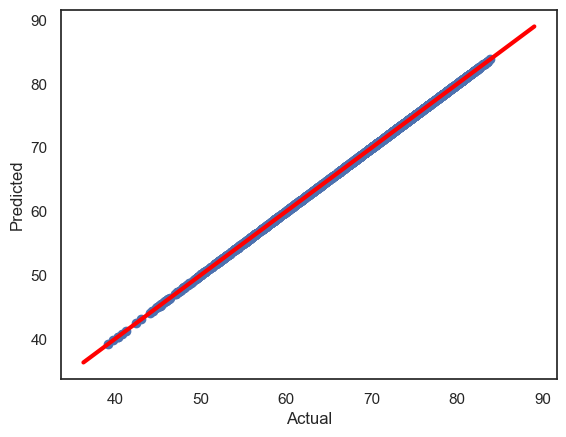

In [ ]:
# lin.predict()
y_predict_lr_train = lr_model.predict(x_train)
y_predict_lr_test = lr_model.predict(x_test)
plt.scatter(y_predict_lr_train,y_predict_lr_train)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],c='red',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
 